# Análisis de mercado inmobiliario de la startup Properati
 

El objetivo de este proyecto es reproducir los pasos que tomaria una Data Scientist cuando se enfrenta a una problemática real.

La metodología usada para llevar a cabo este proyecto fue seleccionar una problemática entre un conjunto de opciones, indagar qué datos podrían ayudarme a abordarla, realizar un análisis exploratorio y entrenar un modelo de Machine Learning para resolverla. 

Este proyecto consta de 3 secciones:
* En la primera parte se encuentra la problemática sobre la cual se trabajo. Se decidió qué datos eran mas relevantes para trabajar en el problema y como obtenerlos.
* En la segunda parte se realizo un Análisis Exploratorio de Datos sobre el dataset.
* En la tercera parte se implementaron herramientas de Machine Learning para predecir la variable de interés.


Este proyecto se realizo gracias al dataset de propiedades en venta publicado en el portal de la inmobiliaria [Properati](www.properati.com.ar)




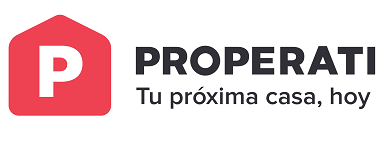

#### Identificación de variables

Una de las primeras tareas que ayudaria a los tasadores a valuar las propiedades es identificar las principales variables que afectan en el proceso, ya que es un proceso difícil y, a veces, subjetivo. Para ello, se propone la creación de un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.




La etapa de "identificación" se ocupa de la formulación del objetivo del proyecto de ciencia de datos; también podría denominarse etapa de “planificación”.
Nos resulta sumamente útil tener una idea muy clara de lo que estamos tratando de lograr mediante el análisis del conjunto de datos en cuestión.

Investigando, y según mi criterio, he considero importante los siguientes datos para avaluar una propiedad:
- Localizacion de la propiedad: Pais, ciudad, barrio
- Tipo de propiedad
- Ubicación en avenida, Calle, carrera
- Superficie total
- Superficie cubierta
- Cantidad de habitaciones
- Cantidad de baños
- Piscina
- Piso del departamento
- Cantidad de departamentos por piso
- Parqueadero
- Metros de jardin o espacios verdes
- Seguridad de la zona
- Vías de acceso
- Colegios alrededor
- Año de construcción de la propiedad
- Otras construcciones en la zona
- Acceso al transporte público

#### Análisis Exploratorio de Datos

El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) lidia con la siguiente pregunta: ¿qué aspecto tienen nuestros datos?

Responderla es una etapa fundamental de nuestro flujo de trabajo como Data Scientists y utilizaremos las visualizaciones y la estadística predictiva para hacerlo. A veces un EDA se convierte en el único objetivo ya que constituye un entregable en sí mismo.

Si bien hay que dejar que “los datos nos guíen”... ¿qué preguntas y curiosidades nos despierta el dataset a medida que lo exploramos?.

Algunas preguntas que nos pueden guiar en el proceso son:
* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?


**Comentarios sobre el dataset:** 

 `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



#### Importamos las librerías necesarias para trabajar 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px

import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

#### Cargamos el dataset usando las funcionalidades de Pandas. Imprimimos para ver la cantidad de filas y columnas que tiene y sus primeras instancias 

In [2]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#### Obtenemos los nombres de las columnas y la cantidad de valores faltantes en cada una de estas

##### - Indentifico duplicados

In [3]:
duplicate_rows_df = properati[properati.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (2358, 19)


##### - Elimino duplicados

In [4]:
properati = properati.drop_duplicates()

##### -Elimino columnas innecesarias

In [5]:
propiedades = properati.drop(['start_date', 'end_date','created_on', 'title', 'description'], axis = 1)

##### - Cambio nombre a las columnas

In [6]:
propiedades = propiedades.rename(columns={'l1': 'country','l2':'zone','l3':'neighborhood'})
propiedades.head()

,lat,lon,country,zone,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,Departamento,Venta
1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,PH,Venta
2,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,PH,Venta
3,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,PH,Venta
4,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,PH,Venta


##### - Identifico la cantidad de filas en cada variable

In [7]:
propiedades.count()

lat                134730
lon                134696
country            144302
zone               144302
neighborhood       144302
rooms              144302
bedrooms           144302
bathrooms          138378
surface_total      124041
surface_covered    122963
price              144302
currency           144302
property_type      144302
operation_type     144302
dtype: int64

##### - Determino los valores Null

In [8]:
propiedades.isnull().sum()

lat                 9572
lon                 9606
country                0
zone                   0
neighborhood           0
rooms                  0
bedrooms               0
bathrooms           5924
surface_total      20261
surface_covered    21339
price                  0
currency               0
property_type          0
operation_type         0
dtype: int64

##### - Filtro del dataset las propiedades con mayor superficies cubiertas respecto a superficie total

In [9]:
propiedades = propiedades[propiedades.surface_covered <= propiedades.surface_total]

##### - Reemplazo los valores Null identificados por la media de esa variable por barrio 

In [10]:
propiedades['bathrooms'].fillna(propiedades.groupby('neighborhood')['bathrooms'].mean().round(0), inplace = True)
#Remuevo valores Null
propiedades.dropna(inplace=True)

##### - Realizo un boxplot del precio para identificar si tenemos valores atipicos

<AxesSubplot:xlabel='price', ylabel='zone'>

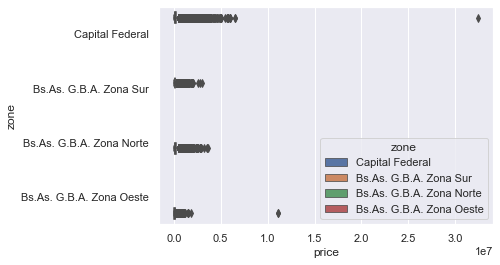

In [11]:
propiedades_outliers = propiedades
sns.boxplot(x = 'price',y='zone', hue = 'zone', data = propiedades_outliers)

##### - Realizo boxplot de la superficie total y la zona para identificar valores atipicos 

<AxesSubplot:xlabel='surface_total', ylabel='zone'>

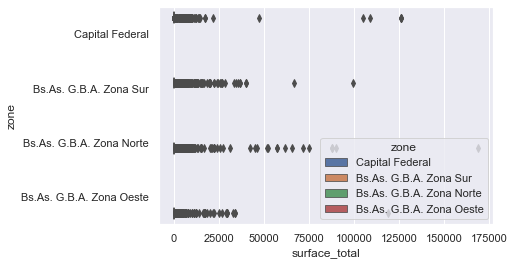

In [12]:
sns.boxplot(x = 'surface_total',y='zone', hue = 'zone', data = propiedades_outliers)

##### Realizo un mapa de calor de los valores nulos para tener una mejor idea de la distribución de valores faltantes en el dataset
- Gráficamente podemos ver en color donde estan los valores faltantes dentro del dataset, esto ayuda a tener una idea dentro de la estructura de los datos

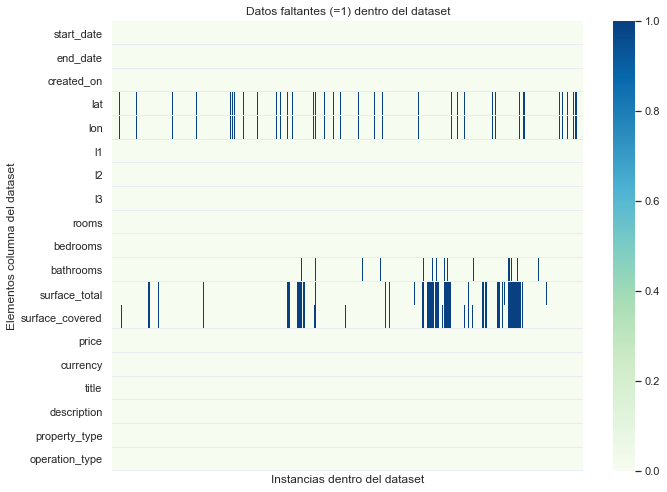

In [13]:
Dat = properati.isnull()
plt.figure(figsize=(10, 7))
heat = sns.heatmap(Dat.T, cmap = "GnBu", xticklabels=False)
plt.title("Datos faltantes (=1) dentro del dataset")
plt.xlabel ("Instancias dentro del dataset")
plt.ylabel ("Elementos columna del dataset")
plt.tight_layout()

##### - Elimino valores atipicos

In [14]:
Q1 = propiedades.quantile(0.25).round(2)
Q3 = propiedades.quantile(0.75).round(2)
IQR = Q3 - Q1
print(IQR)

lat                     0.05
lon                     0.09
rooms                   2.00
bedrooms                2.00
bathrooms               1.00
surface_total          85.00
surface_covered        61.00
price              148675.00
dtype: float64


##### - Visualizo Boxplot del precio y zona 

<AxesSubplot:xlabel='price', ylabel='zone'>

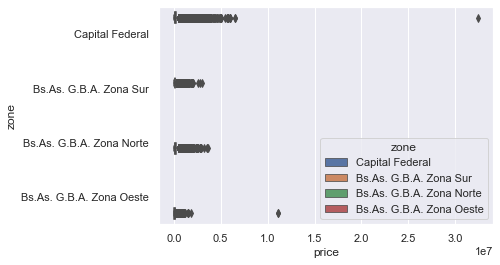

In [15]:
sns.boxplot(data = propiedades, x='price',y = 'zone', hue= 'zone')

##### - Visualizo Boxplot de superficie total y zona

<AxesSubplot:xlabel='surface_total', ylabel='zone'>

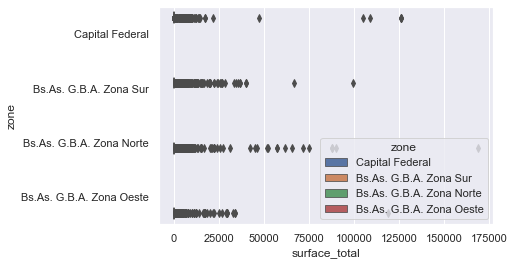

In [16]:
sns.boxplot(data = propiedades, x='surface_total',y = 'zone', hue= 'zone')

##### - Obtengo estadisticas

In [17]:
propiedades.describe().round(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,111335.00,111335.00,111335.00,111335.00,111335.00,111335.00,111335.00,111335.00
mean,-34.60,-58.46,3.13,2.06,1.57,192.87,102.63,237939.35
std,0.10,0.14,1.38,1.08,0.86,1505.47,705.01,289656.46
min,-35.15,-59.04,1.00,0.00,1.00,10.00,1.00,6000.00
25%,-34.62,-58.50,2.00,1.00,1.00,52.00,46.00,115000.00
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,67.00,168000.00
75%,-34.57,-58.41,4.00,3.00,2.00,137.00,107.00,263675.00
max,-34.16,-57.81,35.00,15.00,14.00,169000.00,126062.00,32434232.00


##### - Obtengo la cantidad de propiedades por zona

<AxesSubplot:>

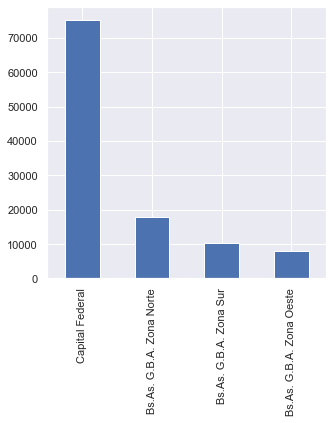

In [18]:
propiedades.zone.value_counts().plot(kind='bar', figsize=(5,5))

##### - Obtengo la media de precios por zona

In [19]:
propiedades.groupby('zone')['price'].mean()

zone
Bs.As. G.B.A. Zona Norte    236664.702219
Bs.As. G.B.A. Zona Oeste    143455.076061
Bs.As. G.B.A. Zona Sur      163002.276548
Capital Federal             258252.604794
Name: price, dtype: float64

##### - Obtengo el precio por zonas

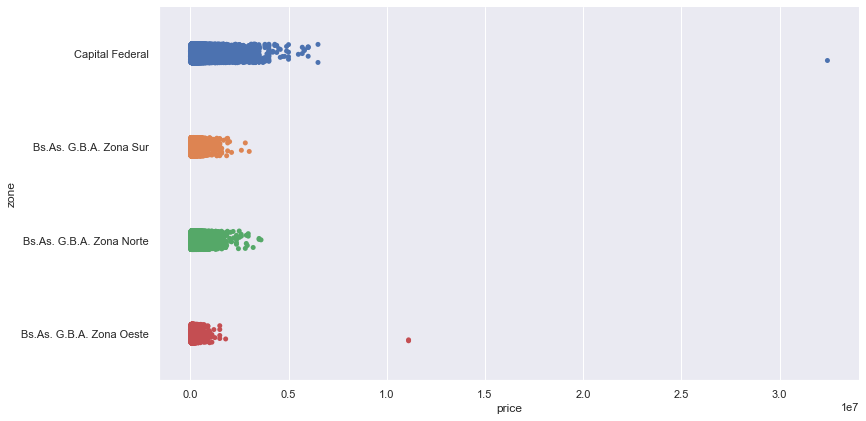

In [20]:
sns.catplot(data = propiedades, y ='zone', x ='price', height=6, aspect=2)

##### - Obtengo el precio por tipo de propiedad en cada zona

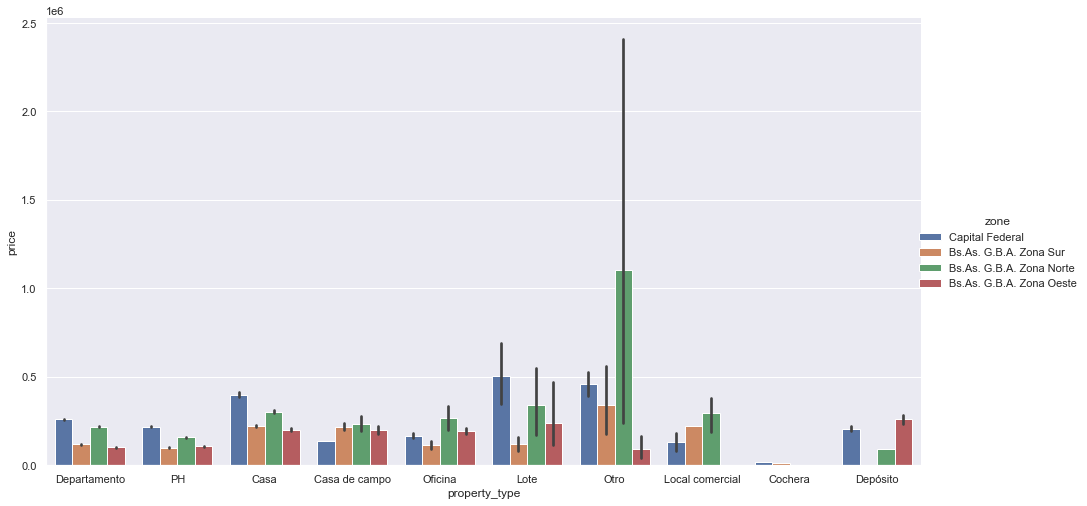

In [21]:
j = sns.catplot(x="property_type", y="price", hue="zone", data=propiedades, kind="bar", height=7, aspect=2)
j.fig.set_figwidth(15)

##### - Promedio de superficie total

In [22]:
propiedades.groupby('zone')['surface_total'].mean()

zone
Bs.As. G.B.A. Zona Norte    344.936829
Bs.As. G.B.A. Zona Oeste    346.597783
Bs.As. G.B.A. Zona Sur      391.395376
Capital Federal             113.607424
Name: surface_total, dtype: float64

##### - Agrupo usando un asignador entre zona y precio

In [23]:
propiedades.groupby('zone')['price'].mean()

zone
Bs.As. G.B.A. Zona Norte    236664.702219
Bs.As. G.B.A. Zona Oeste    143455.076061
Bs.As. G.B.A. Zona Sur      163002.276548
Capital Federal             258252.604794
Name: price, dtype: float64

##### - Elaboro un mapa de calor para observar las correlaciones

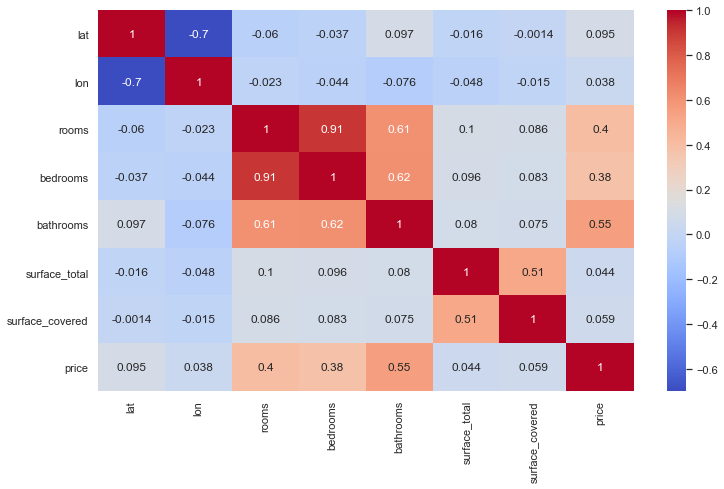

In [24]:
plt.figure(figsize=(12, 7))
sns.heatmap(propiedades.corr(),cmap='coolwarm',annot=True)
plt.show()

##### - Relaciono la cantidad de cuartos respecto a las habitaciones

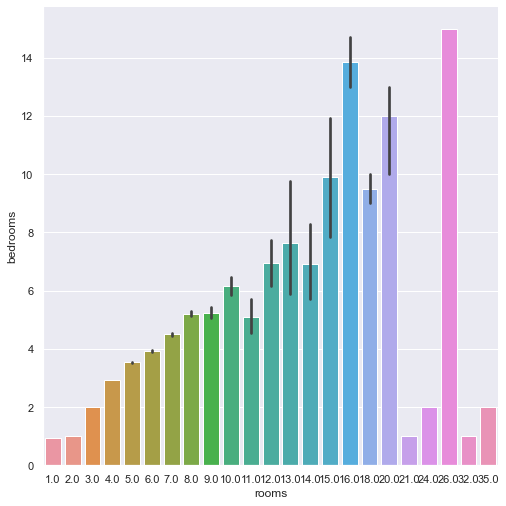

In [25]:
sns.catplot(data=propiedades, x='rooms', y='bedrooms', kind='bar', height=7, aspect=1)

##### - Relaciono el precio respecto a la cantidad de baños

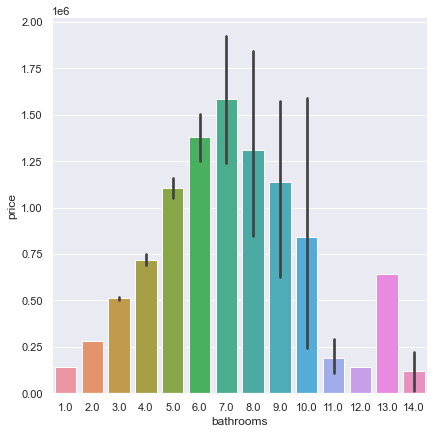

In [26]:
sns.catplot(data=propiedades, x='bathrooms', y='price',kind='bar', height=6, aspect=1)

##### - Calculo la correlación de columnas por pares, excluyendo NA / valores nulos

In [27]:
propiedades.corr().round(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.00,-0.70,-0.06,-0.04,0.10,-0.02,-0.00,0.10
lon,-0.70,1.00,-0.02,-0.04,-0.08,-0.05,-0.02,0.04
rooms,-0.06,-0.02,1.00,0.91,0.61,0.10,0.09,0.40
bedrooms,-0.04,-0.04,0.91,1.00,0.62,0.10,0.08,0.38
bathrooms,0.10,-0.08,0.61,0.62,1.00,0.08,0.07,0.55
surface_total,-0.02,-0.05,0.10,0.10,0.08,1.00,0.51,0.04
surface_covered,-0.00,-0.02,0.09,0.08,0.07,0.51,1.00,0.06
price,0.10,0.04,0.40,0.38,0.55,0.04,0.06,1.00


#### Procedo a obtener los tipos de propiedad publicados, la cantidad de instancias por cada tipo de propiedad por medio del uso de las funcionalidad de Pandas y con un gráfico apropiado de Seaborn.

##### - Obtengo la cantidad de propiedades acorde a su tipo

In [28]:
propiedades['property_type'].value_counts()

Departamento       82819
Casa               14564
PH                 13258
Oficina              310
Casa de campo        240
Otro                  95
Lote                  28
Local comercial       14
Depósito               5
Cochera                2
Name: property_type, dtype: int64

##### - Grafico el tipo de propiedades respecto al precio

<AxesSubplot:>

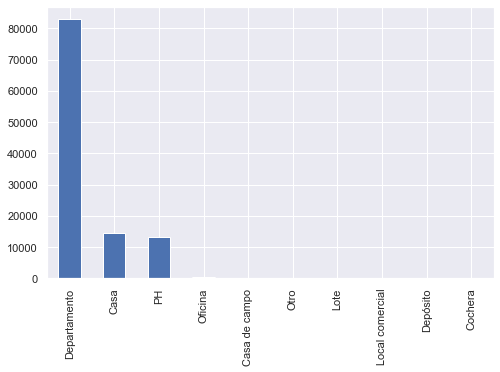

In [29]:
propiedades.property_type.value_counts().plot(kind='bar', figsize=(8,5))

##### - Realice un catplot del tipo "count" para visualizar la variable categorica

El siguiente grafico es de tipo:


seaborn.axisgrid.FacetGrid

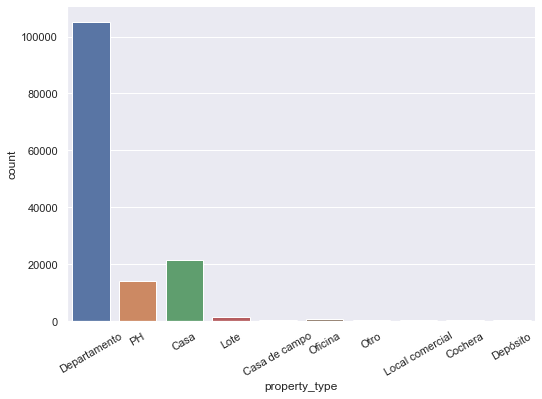

In [30]:
ptypegraf = sns.catplot(data=properati, x="property_type", aspect=1.5, kind="count")
ptypegraf.set_xticklabels(rotation=30)
print("El siguiente grafico es de tipo:")
type(ptypegraf)

#### Para averiguar a que regiones pertenecen las publicaciones realice gráficos de barras para las variables `l2` y `l3`. 

##### - Obtengo la cantidad de publicaciones de propiedades por zona

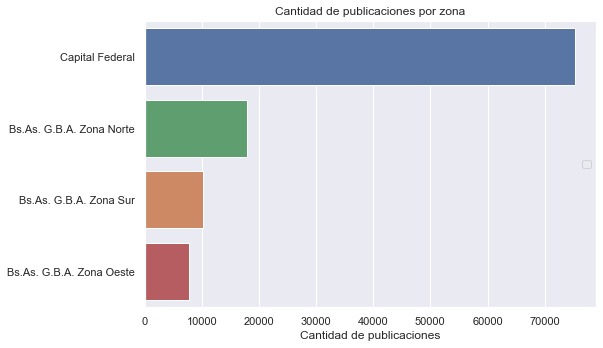

In [31]:
plt.figure(figsize = (15,5), facecolor='white')
plt.subplot(1,2,1)
sns.countplot(y = "zone", hue = "zone", data = propiedades, dodge=False,order = propiedades['zone'].value_counts().index)
plt.title("Cantidad de publicaciones por zona")
plt.xlabel("Cantidad de publicaciones")
plt.ylabel("")
plt.legend("")

plt.tight_layout()

plt.show()

##### - Obtengo la cantidad de publicaciones de propiedades por barrio

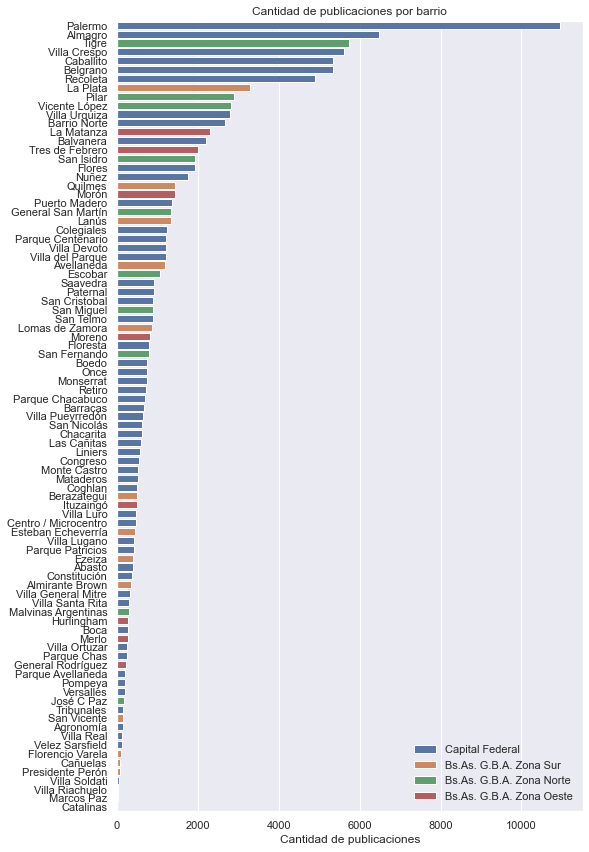

In [32]:
plt.figure(figsize = (15,12), facecolor='white')
plt.subplot(1,2,2)
sns.countplot(y = "neighborhood", hue = "zone", data = propiedades, dodge=False, order = propiedades['neighborhood'].value_counts().index)
plt.title("Cantidad de publicaciones por barrio")
plt.xlabel("Cantidad de publicaciones")
plt.ylabel("")
plt.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()

Observamos que la mayoria de anuncios corresponden a Capital Federal, lo cual tiene mucho sentido debido a la alta población en la zona. 
Dentro de este grupo, las publicaciones en Palermo son las más relevantes. Seguido en relevancia tenemos las publicaciones de la Zona Norte, la zona Sur y finalmente la Zona Oeste de Gran Buenos Aires.

En este caso, los gráficos de barras no son la mejor opción para visualizar estos datos. Por ende, procederemos a crear una base auxiliar a partir de la cual podemos mostrar esto desde una perspectiva geográfica en un gráfico tipo Pyplot. 

##### - Base auxiliar, primera parte: Colapso en media para l2 y l3

In [33]:
base2= properati.groupby(['l2', 'l3']).mean()
base2 = base2.rename_axis(['Zona', 'Barrio/Ciudad']).reset_index()
base2 = base2[['Zona', 'Barrio/Ciudad', 'lat', 'lon']]

##### - Base auxiliar, segunda parte:cuenta de oferta por barrio/ciudad (l3)

In [34]:
base3 = properati.l3.value_counts()
base3 = base3.rename_axis(['Barrio/Ciudad']).reset_index()
base3 = base3.rename(columns={'l3':'count'})

##### - Base auxiliar, tercera parte: Unión

In [35]:
base4 = pd.merge(base2, base3, on='Barrio/Ciudad')

##### - Grafico la referencia geográfica de las propiedades por Región

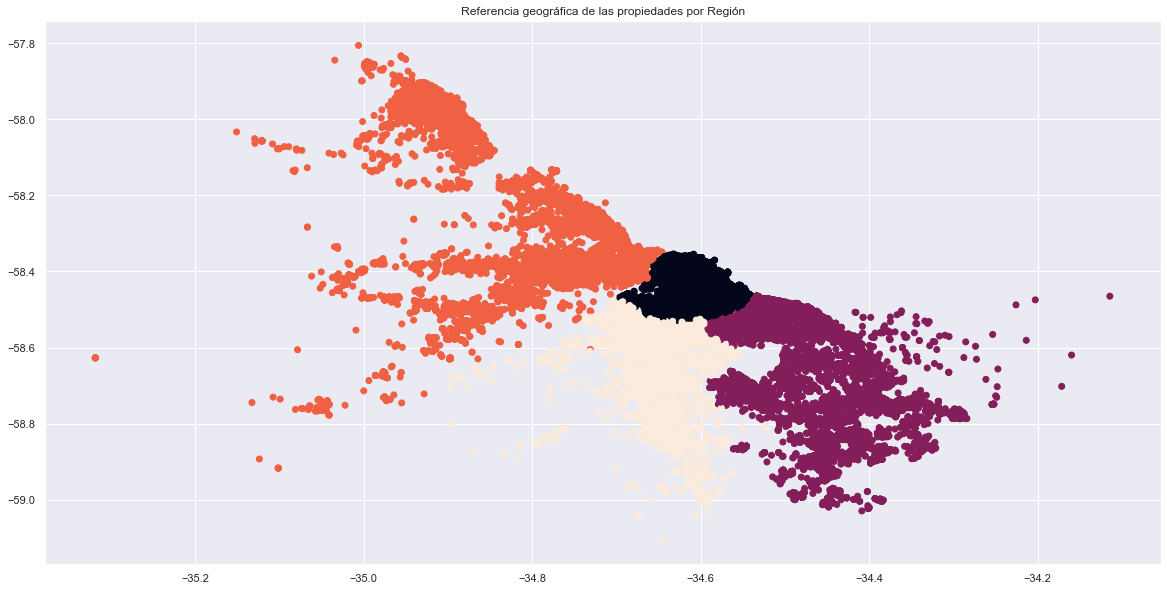

In [36]:
prop_geo = properati[properati['lat']<-33]
prop_geo = prop_geo[prop_geo['lon']>-60]
x=prop_geo['lat']
y=prop_geo['lon']
colo=prop_geo['l2']
colo.replace({"Capital Federal": 0, "Bs.As. G.B.A. Zona Norte": 1, "Bs.As. G.B.A. Zona Sur": 2, "Bs.As. G.B.A. Zona Oeste": 3}, inplace=True)


plt.figure(figsize=(20,10))
plt.scatter(x, y, c = colo)
plt.title('Referencia geográfica de las propiedades por Región')
plt.show()

#### Seleccione las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. 

##### - Importo nuevamente el dataset original para esta sección

In [37]:
properati2 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
properati2 = properati2.rename(columns={'l1': 'country','l2':'zone','l3':'neighborhood'})

##### - Realizo el filtro para obtener la zona y tipos de propiedad que se encuentran en mayor cantidad

In [38]:
region_abundante = properati2.zone.value_counts().idxmax()
property_type_max = list(properati2.property_type.value_counts().nlargest(3).index)

In [39]:
capital_federal = properati2[properati2.zone.isin([region_abundante]) & properati2.property_type.isin(property_type_max)]
capital_federal.shape

(91485, 19)

#### Procedi a estudiar  la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. 

##### - Reviso la cantidad de datos que quedan

In [40]:
capital_federal.count()

start_date         91485
end_date           91485
created_on         91485
lat                86951
lon                86937
country            91485
zone               91485
neighborhood       91485
rooms              91485
bedrooms           91485
bathrooms          89314
surface_total      82568
surface_covered    82250
price              91485
currency           91485
title              91485
description        91485
property_type      91485
operation_type     91485
dtype: int64

##### - Reviso valores nulos

In [41]:
print(capital_federal.isnull().sum())

start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
country               0
zone                  0
neighborhood          0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


##### - Elimino valores nulos

In [42]:
capital_federal1 = capital_federal.dropna()
capital_federal1.count()

start_date         76961
end_date           76961
created_on         76961
lat                76961
lon                76961
country            76961
zone               76961
neighborhood       76961
rooms              76961
bedrooms           76961
bathrooms          76961
surface_total      76961
surface_covered    76961
price              76961
currency           76961
title              76961
description        76961
property_type      76961
operation_type     76961
dtype: int64

##### - Detecte los outliers 

In [43]:
Q1_f1 = capital_federal1.quantile(0.25)
Q3_f1 = capital_federal1.quantile(0.75)
IQR_f1= Q3_f1 - Q1_f1
print(IQR_f1)

lat                     0.028110
lon                     0.047743
rooms                   2.000000
bedrooms                2.000000
bathrooms               1.000000
surface_total          61.000000
surface_covered        51.000000
price              154000.000000
dtype: float64


##### - Elimino los outliers

In [44]:
capital_federal1_1 = capital_federal1[~((capital_federal1 < (Q1_f1 - 1.5 * IQR_f1)) | (capital_federal1 > (Q3_f1 + 1.5 * IQR_f1))).any(axis=1)]
capital_federal1_1.describe()

<ipython-input-44-40f4f33a0b3c>:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

<ipython-input-44-40f4f33a0b3c>:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000,66113.000000
mean,-34.598127,-58.435799,2.738690,1.794564,1.346604,73.143754,64.531393,186378.069169
std,0.021669,0.034545,1.007787,0.847861,0.567697,34.939094,29.173510,91761.285810
min,-34.654322,-58.528924,1.000000,0.000000,1.000000,10.000000,2.000000,7500.000000
25%,-34.611465,-58.457059,2.000000,1.000000,1.000000,47.000000,42.000000,118000.000000
50%,-34.599124,-58.433364,3.000000,2.000000,1.000000,65.000000,57.000000,164800.000000
75%,-34.585602,-58.412198,3.000000,2.000000,2.000000,90.000000,80.000000,235000.000000
max,-34.541975,-58.353930,7.000000,6.000000,3.000000,201.000000,171.000000,509000.000000


##### - Para el precio

<AxesSubplot:xlabel='price'>

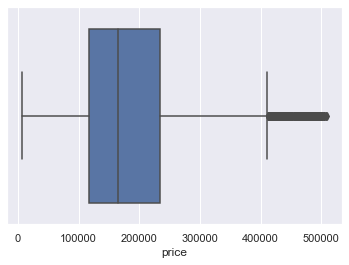

In [45]:
sns.boxplot(x=capital_federal1_1['price'])

##### - Para la superficie total

<AxesSubplot:xlabel='surface_total'>

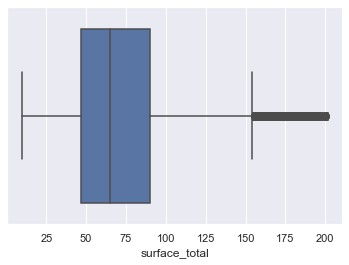

In [46]:
sns.boxplot(x=capital_federal1_1['surface_total'])

##### - Para la superficie cubierta

<AxesSubplot:xlabel='surface_covered'>

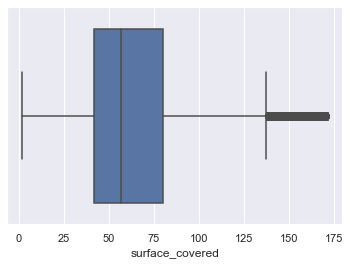

In [47]:
sns.boxplot(x=capital_federal1_1['surface_covered'])

##### - Para los cuartos

<AxesSubplot:xlabel='rooms'>

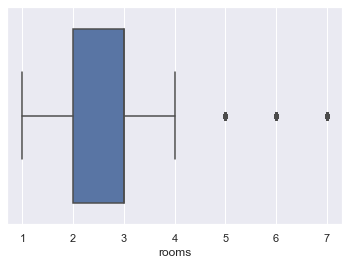

In [48]:
sns.boxplot(x=capital_federal1_1['rooms'])

Si bien habíamos encontrado que las variables de interés discretas (cantidad de habitaciones, dormitorios y baños) tenian distribuciones bastante simétricas, podemos ver que hay cierta asimetría derecha proporcionada a causa de unos outliers. No obstante, mantendremos estas observaciones.

Dado que las propiedades no pueden tener una superficie cubierta mayor a la superficie total, revisamos:

##### - Para analizar si esta condición se cumple

In [49]:
capital_federal1_1[capital_federal1_1.surface_covered > capital_federal1_1.surface_total]

,start_date,end_date,created_on,lat,lon,country,zone,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
859,2019-04-25,2019-05-21,2019-04-25,-34.561805,-58.459579,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,43.0,44.0,133000.0,USD,Departamento 3 ambientes.Belgrano,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
924,2019-04-25,9999-12-31,2019-04-25,-34.584201,-58.496345,Argentina,Capital Federal,Villa Pueyrredón,3.0,2.0,1.0,65.0,66.0,187000.0,USD,VENTA DEPTO 3 AMB VILLA PUEYRREDON CON COCHERA,Corredor Responsable: EMMA A. PIERSIMONI - CPI...,Departamento,Venta
1329,2019-07-08,2019-11-12,2019-07-08,-34.576322,-58.406275,Argentina,Capital Federal,Recoleta,2.0,1.0,2.0,44.0,45.0,235000.0,USD,DIVINO 2 AMB BAÑO Y TOIL RECICLADO POR ARQUITECTO,Corredor Responsable: KARINA QUINTEROS - CUCIC...,Departamento,Venta
1438,2019-07-08,2019-08-17,2019-07-08,-34.610787,-58.393919,Argentina,Capital Federal,Congreso,3.0,2.0,1.0,78.0,79.0,235000.0,USD,Venta dep-Congreso 3 amb-Restaurado-Impecable-,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,Venta
1772,2019-03-03,2019-09-14,2019-03-03,-34.630626,-58.464626,Argentina,Capital Federal,Flores,3.0,2.0,1.0,83.0,84.0,145000.0,USD,Flores. Dpto. 3 amb con dep. Frente. Luminoso,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139236,2019-07-31,9999-12-31,2019-07-31,-34.592064,-58.491718,Argentina,Capital Federal,Agronomía,4.0,2.0,2.0,55.0,72.0,175000.0,USD,Venta Casa en Agronomia Capital Federal BOLIVI...,"Casa en Venta, LOTE - CASA A REFACCIONAR EN AG...",Casa,Venta
145138,2020-01-15,2020-03-12,2020-01-15,-34.626300,-58.452418,Argentina,Capital Federal,Caballito,1.0,1.0,1.0,24.0,25.0,54900.0,USD,VENTA DEPTO MONOAMBIENTE- IDEAL INVERSOR-CABAL...,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,Venta
145146,2020-01-15,2020-01-21,2020-01-15,-34.605086,-58.384630,Argentina,Capital Federal,San Nicolás,1.0,1.0,1.0,21.0,22.0,48000.0,USD,Monoambiente exc ubicación 1 cuadra obelisco,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta
145262,2020-01-15,9999-12-31,2020-01-15,-34.600988,-58.433062,Argentina,Capital Federal,Villa Crespo,3.0,2.0,1.0,51.0,52.0,127000.0,USD,Depto 3 ambientes.Muy buen estado. Villa crespo,Corredor Responsable: Patricia Maria Sodor - C...,Departamento,Venta


Podemos observar que tenemos 536 lineas de datos donde la superficie total es menor a la sueprficie cubierta, lo cual no son datos con validez.

##### - Filtramos estas instancias

In [50]:
capital_federal_sup = capital_federal1_1[capital_federal1_1.surface_covered < capital_federal1_1.surface_total]
capital_federal_sup.shape

(45615, 19)

##### - Observo la relación superficie cubierta con precio

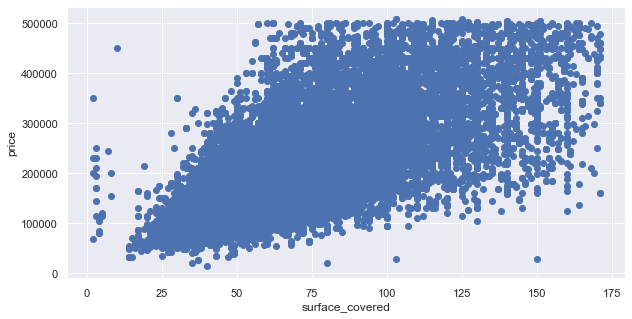

In [51]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(capital_federal_sup['surface_covered'], capital_federal_sup['price'])
ax.set_xlabel('surface_covered')
ax.set_ylabel('price')
plt.show()


##### - Observo nuevamente las correlaciones por medio de un mapa de calor

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.158443,-0.049180,-0.058712,0.070735,-0.024452,-0.015498,0.262215
lon,-0.158443,1.000000,0.065573,0.066490,0.034288,-0.001955,0.080245,0.115361
rooms,-0.049180,0.065573,1.000000,0.936787,0.518605,0.737734,0.799204,0.581544
bedrooms,-0.058712,0.066490,0.936787,1.000000,0.523825,0.719906,0.788945,0.562172
bathrooms,0.070735,0.034288,0.518605,0.523825,1.000000,0.554272,0.617771,0.603186
surface_total,-0.024452,-0.001955,0.737734,0.719906,0.554272,1.000000,0.907461,0.704327
surface_covered,-0.015498,0.080245,0.799204,0.788945,0.617771,0.907461,1.000000,0.751749
price,0.262215,0.115361,0.581544,0.562172,0.603186,0.704327,0.751749,1.000000


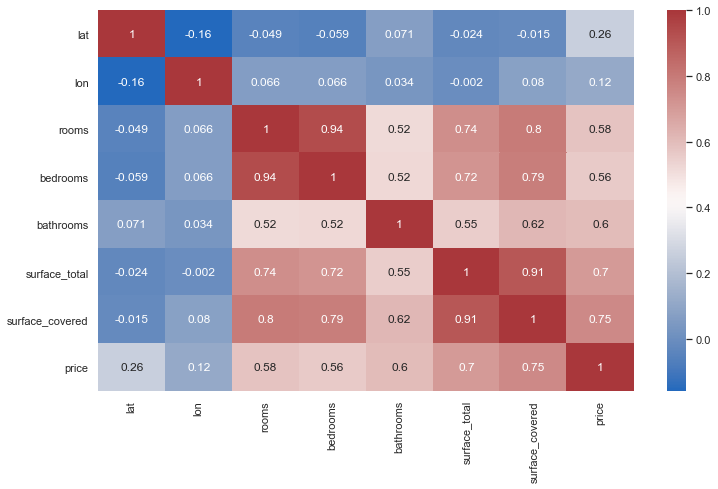

In [52]:
plt.figure(figsize=(12,7))
heat = capital_federal_sup.corr()
sns.heatmap(heat, cmap='vlag', annot = True)
heat

En este caso comienzan a aparecer correlaciones para la variable Precio más definidas, lo cual es un buen indicador ya que es nuestra variable de mayor interes. 

##### - Obtengo la relación de barrios vs precio 

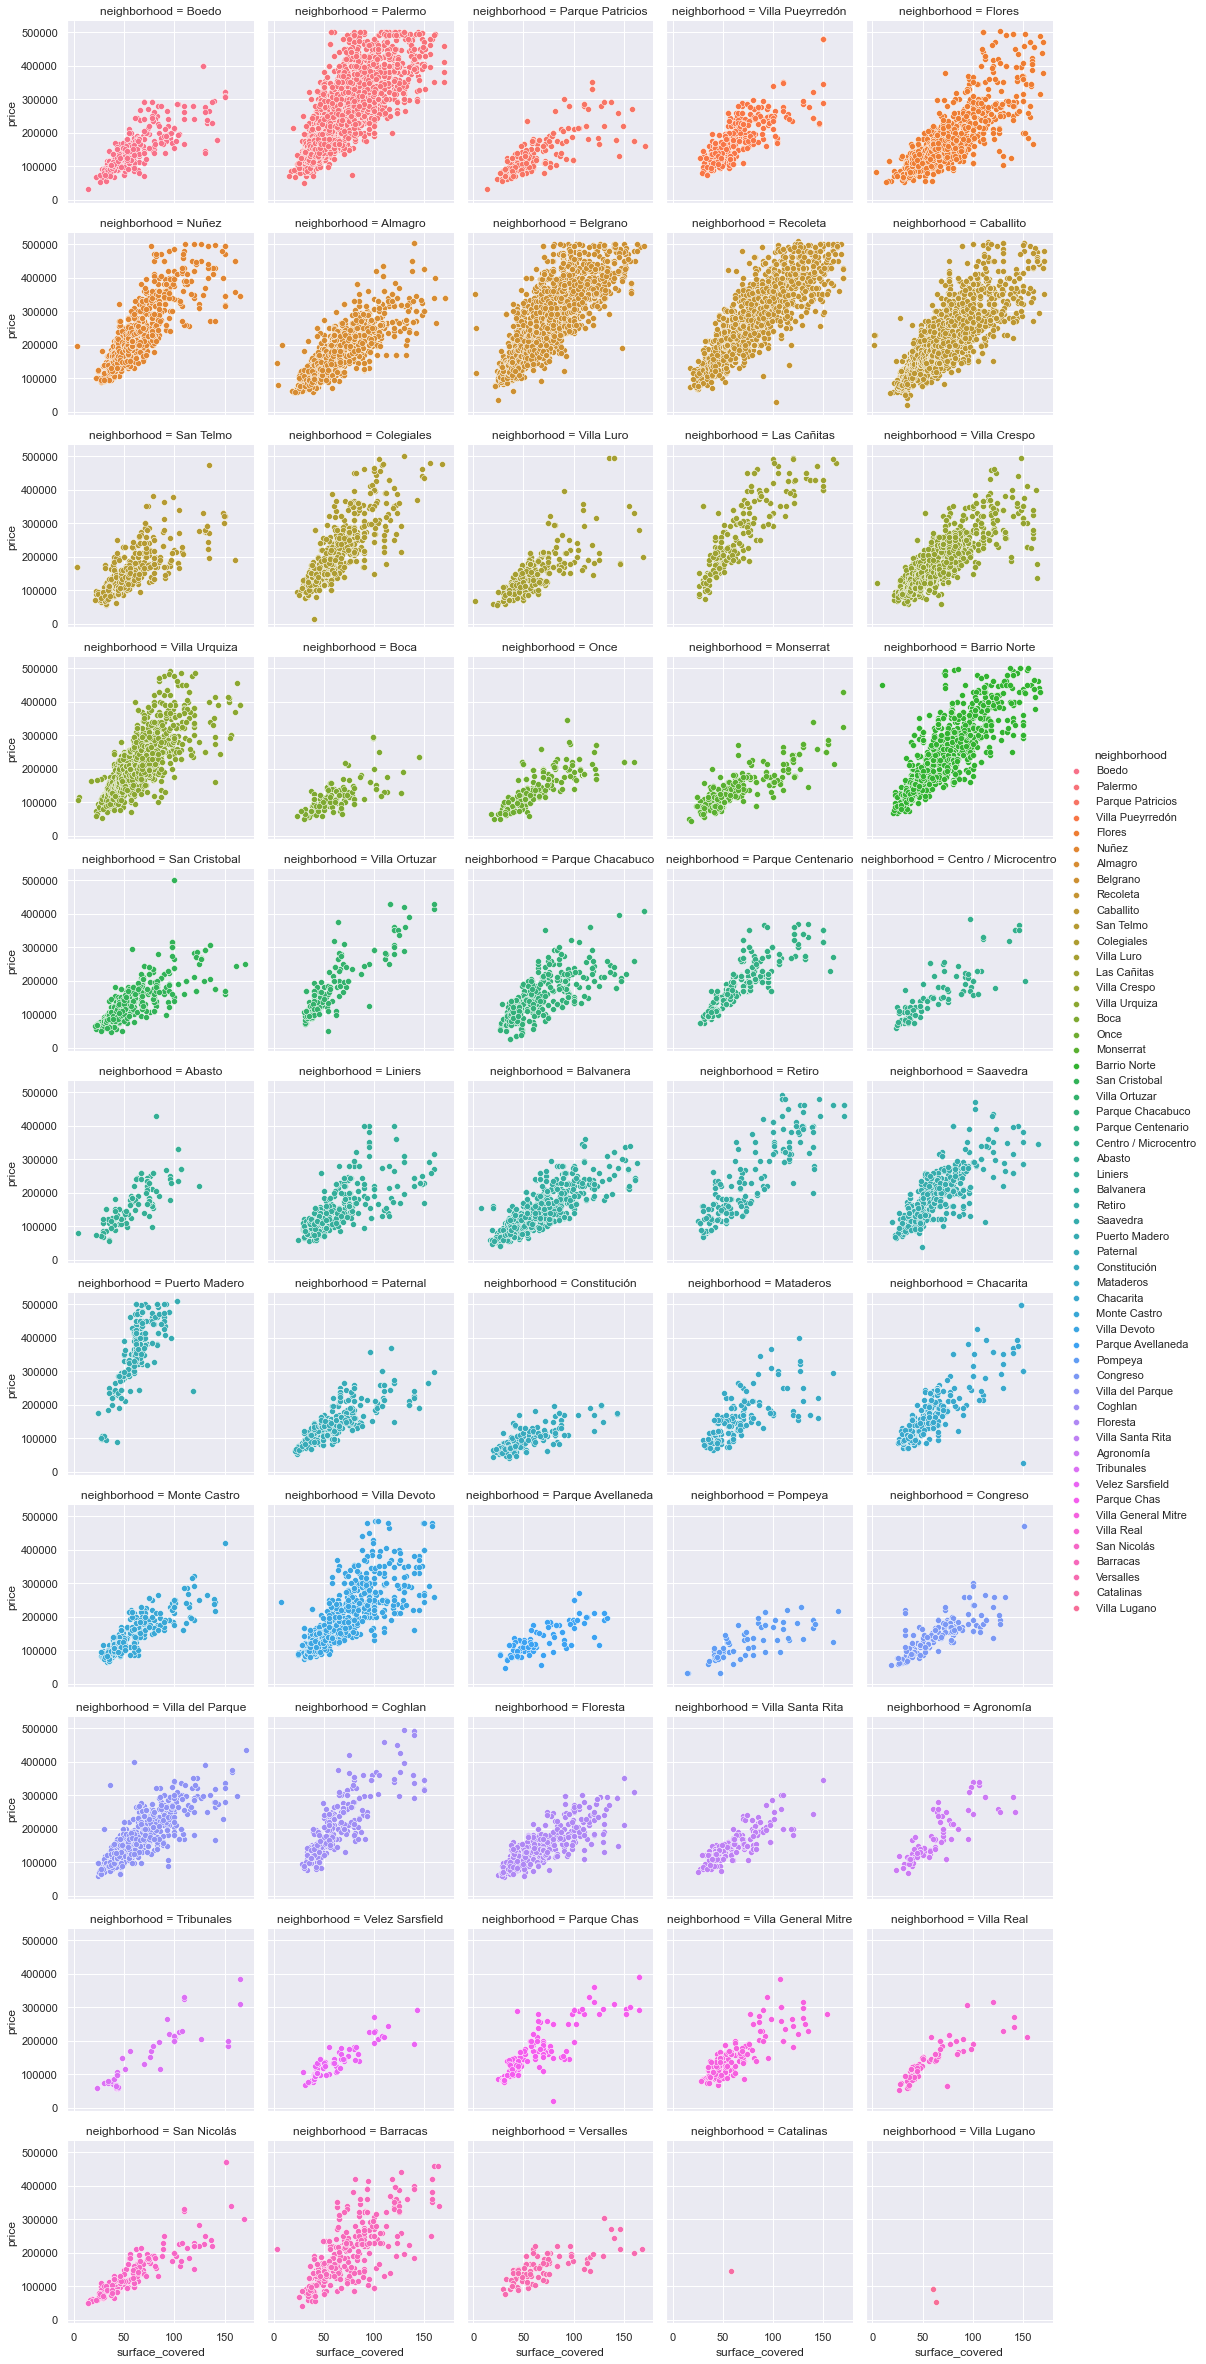

In [53]:
grid = sns.FacetGrid(capital_federal_sup, col="neighborhood", hue="neighborhood", col_wrap=5)
grid.map(sns.scatterplot, "surface_covered", "price")

grid.add_legend()
plt.show()

#### Procedi a estudiar la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para determinar cuales son mejores en pro de determinar el precio y la diferencia que encuentro acorde a cada tipo de propiedad. 

##### - Para ver la distribución de la relación entre la superficie cubierta y el precio para cada tipo de propiedad:

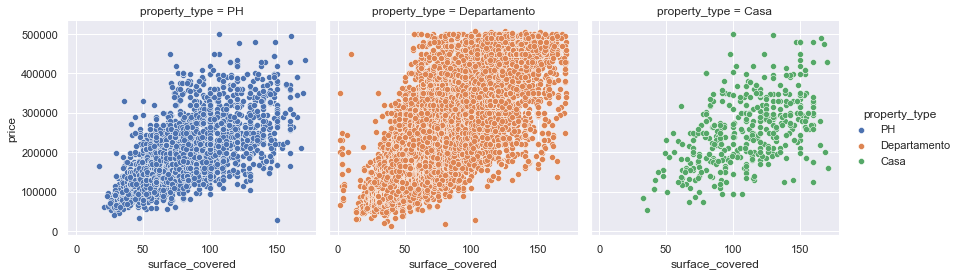

In [54]:
grid = sns.FacetGrid(capital_federal_sup, col="property_type", hue="property_type", col_wrap=3, height=4, aspect=1)
grid.map(sns.scatterplot, "surface_covered", "price")

grid.add_legend()
plt.show()

##### - Agregue la columna precio por m2 al dataset para analizar si era valiosa la información:

In [55]:
preciom2 = capital_federal_sup['price']/capital_federal_sup['surface_total']
capital_federal_sup['preciom2'] = np.array(preciom2)
capital_federal_sup.head(5)

<ipython-input-55-3737dadc2484>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,start_date,end_date,created_on,lat,lon,country,zone,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,preciom2
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2271.428571
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,3470.588235
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta,1977.777778
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta,1977.777778
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,USD,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH,Venta,2575.757576


##### - Busque la diferencia de la relación entre superficie total y precio Vs. superficie cubierta y precio

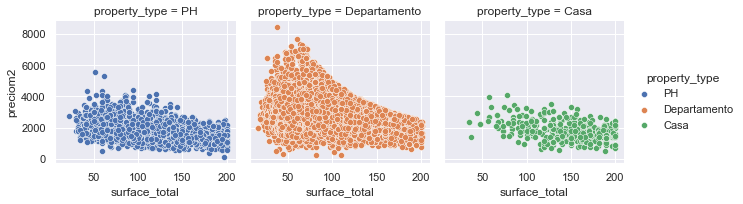

In [56]:
grid = sns.FacetGrid(capital_federal_sup, col="property_type", hue="property_type", col_wrap=3)
grid.map(sns.scatterplot, "surface_total", "preciom2")

grid.add_legend()
plt.show()

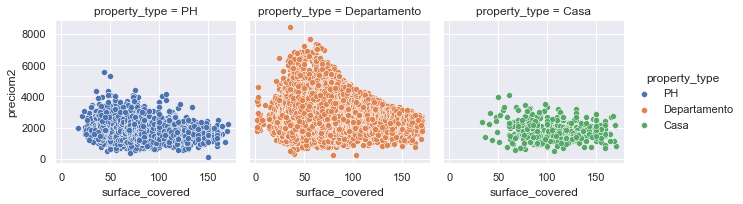

In [57]:
grid = sns.FacetGrid(capital_federal_sup, col="property_type", hue="property_type", col_wrap=3)
grid.map(sns.scatterplot, "surface_covered", "preciom2")

grid.add_legend()
plt.show()

##### - Para ver la distribución de la relación entre ambientes y precios para cada tipo de propiedad:

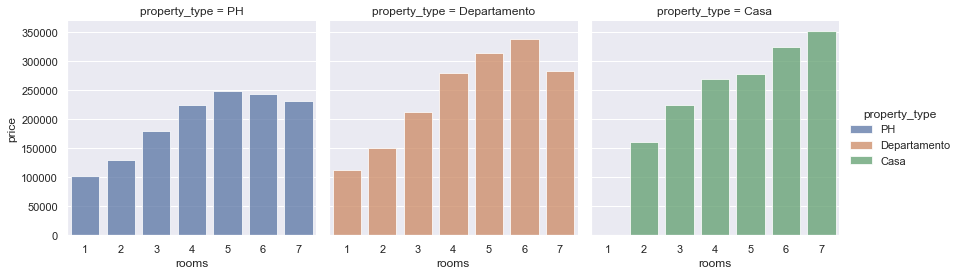

In [58]:
grid = sns.FacetGrid(capital_federal_sup, col="property_type", hue="property_type", col_wrap=3, height=4, aspect=1)
grid.map(sns.barplot, "rooms", "price", alpha=0.75, ci=None, order=[1,2,3,4,5,6,7], hue_order=['rooms', 'price'])

grid.add_legend()
plt.show()

##### - Para ver la distribución de la relación entre ambientes y precios por m2 para cada tipo de propiedad:

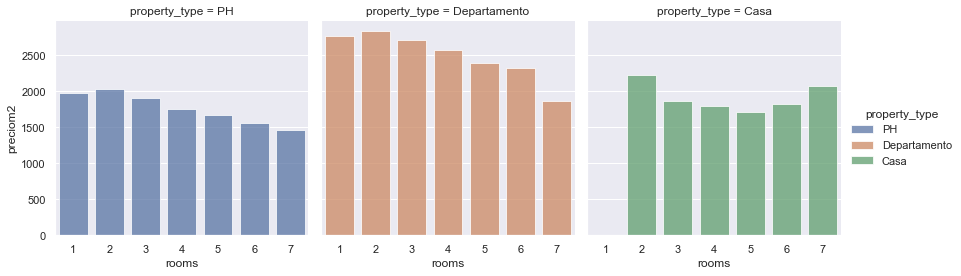

In [59]:
grid = sns.FacetGrid(capital_federal_sup, col="property_type", hue="property_type", col_wrap=3, height=4, aspect=1)
grid.map(sns.barplot, "rooms", "preciom2", alpha=0.75, ci=None, order=[1,2,3,4,5,6,7], hue_order=['rooms', 'preciom2'])

grid.add_legend()
plt.show()

##### - Para ver la relación entre baños y precios para cada tipo de propiedad:

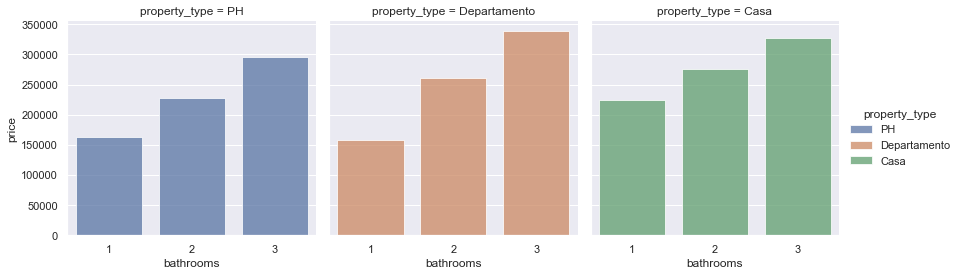

In [60]:
grid = sns.FacetGrid(capital_federal_sup, col="property_type", hue="property_type", col_wrap=3, height=4, aspect=1)
grid.map(sns.barplot, "bathrooms", "price", alpha=0.75, ci=None, order=[1,2,3], hue_order=['bathrooms', 'price'])

grid.add_legend()
plt.show()

##### - Para ver la relación entre baños y precios por m2 para cada tipo de propiedad:

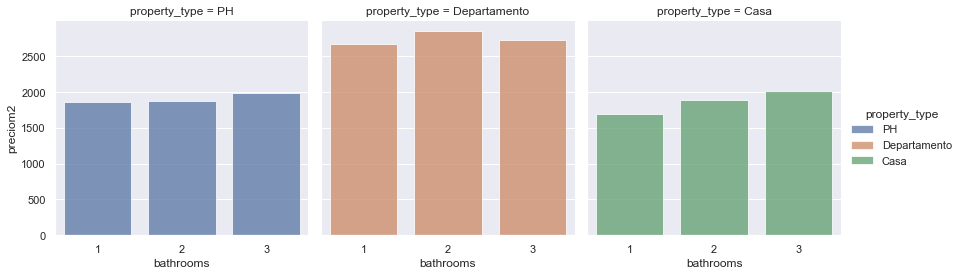

In [61]:
grid = sns.FacetGrid(capital_federal_sup, col="property_type", hue="property_type", col_wrap=3, height=4, aspect=1)
grid.map(sns.barplot, "bathrooms", "preciom2", alpha=0.75, ci=None, order=[1,2,3], hue_order=['bathrooms', 'preciom2'])

grid.add_legend()
plt.show()

##### - Para observar el precio promedio por m2 para cada barrio:

In [62]:
acum = capital_federal_sup.groupby('neighborhood', as_index=False).agg({'preciom2': 'mean'})
acum.shape

(55, 2)

#### Ahora, procedo a hallar el precio promedio por barrio para las casas de 4 ambientes


In [63]:
casas=capital_federal_sup[(capital_federal_sup.property_type=='Casa')]
casas.shape

(526, 20)

In [64]:
desafio=casas[(casas.rooms==4)]
desafio.shape

(255, 20)

In [65]:
desafio.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,preciom2
count,255.000000,255.000000,255.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,-34.607756,-58.470177,4.0,2.882353,1.733333,153.270588,116.156863,269963.133333,1792.847829
std,0.028919,0.035810,0.0,0.346357,0.633285,27.378963,24.854833,76732.057930,528.559741
min,-34.653753,-58.528411,4.0,2.000000,1.000000,84.000000,70.000000,95000.000000,700.000000
25%,-34.632659,-58.494979,4.0,3.000000,1.000000,134.000000,95.500000,217000.000000,1436.778736
50%,-34.609845,-58.475718,4.0,3.000000,2.000000,155.000000,113.000000,270000.000000,1775.956284
75%,-34.586258,-58.454449,4.0,3.000000,2.000000,172.000000,135.000000,322500.000000,2110.962302
max,-34.546333,-58.369739,4.0,4.000000,3.000000,200.000000,170.000000,490000.000000,3543.307087


In [66]:
barrio=desafio.groupby('neighborhood', as_index=False).mean()

In [67]:
barrio.sort_values('price', ascending=False, inplace=True)
barrio.head(10)

,neighborhood,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,preciom2
4,Belgrano,-34.568245,-58.467444,4.0,3.333333,2.333333,179.666667,158.666667,473333.333333,2654.070338
18,Parque Centenario,-34.609528,-58.437127,4.0,3.000000,2.000000,160.000000,135.000000,350000.000000,2187.500000
8,Coghlan,-34.558589,-58.477683,4.0,2.800000,1.800000,165.100000,133.100000,342980.000000,2089.794568
15,Nuñez,-34.555975,-58.475573,4.0,2.900000,1.800000,160.000000,131.200000,336560.000000,2101.965354
26,San Telmo,-34.618420,-58.371641,4.0,2.333333,2.000000,194.000000,133.666667,333000.000000,1718.746606
16,Palermo,-34.578026,-58.440464,4.0,3.000000,1.166667,173.666667,135.500000,332500.000000,1997.655006
6,Caballito,-34.613225,-58.453839,4.0,2.941176,1.882353,150.117647,116.705882,331923.529412,2281.790459
29,Villa Crespo,-34.603268,-58.451579,4.0,3.000000,2.142857,157.857143,127.428571,328285.714286,2078.393022
24,Saavedra,-34.552584,-58.484588,4.0,2.818182,1.818182,137.454545,104.909091,312000.000000,2369.512606
1,Almagro,-34.605164,-58.422829,4.0,3.000000,2.500000,143.000000,98.250000,307000.000000,2301.026605


### Machine Learning

En esta parte, entrene dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`)

Los pasos que considere para este proceso fueron:
* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser críticoa con la metodología utilizada.



##### - Cargo nuevamente el dataset original

In [68]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
properati.shape

(146660, 19)

In [69]:
properati.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


##### Filtrado 1: Selecciono aquellas propiedades en Capital Federal y con tipo de propiedad más relevante en cuanto a cantidad
##### Creo un subdataset para CABA

In [70]:
CABA = properati[properati.l2=='Capital Federal']
CABA_idx = CABA.set_index('property_type')

##### - Extraigo del dataset de CABA los 3 tipos de propiedades con mayor cantidad

In [71]:
filtro = CABA_idx.loc[['Departamento', 'PH', 'Casa']]

##### - Devuelvo el indice al dato de la columna

In [72]:
filtro.reset_index(level=0, inplace=True)
filtro.shape

(91485, 19)

##### - Filtrado 2:  Selecciono aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2

In [73]:
filtro1 = filtro[(filtro.surface_total<=1000)&(filtro.surface_total>=15)]
filtro1.shape

(82405, 19)

##### - Filtrado 3: Selecciono aquellas propiedades cuyo precio es menor a 4000000 dolares

In [74]:
filtro2 = filtro1[(filtro1.price<=4000000)]
filtro2.shape

(82373, 19)

##### - Filtrado 4: Selecciono las columnas 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered' y 'price'

In [75]:
filtro3 = filtro2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
filtro3.shape

(82373, 6)

##### - Filtrado 5: Descarto las instancias con valores faltantes

In [76]:
print(filtro3.isnull().sum())

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64


##### - Elimino las filas que tienen valores nulos


In [77]:
CABA_ML = filtro3.dropna()
CABA_ML.count()

rooms              81019
bedrooms           81019
bathrooms          81019
surface_total      81019
surface_covered    81019
price              81019
dtype: int64

In [78]:
CABA_ML.shape

(81019, 6)

##### - Procedo a observar las correlaciones del nuevo dataset

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


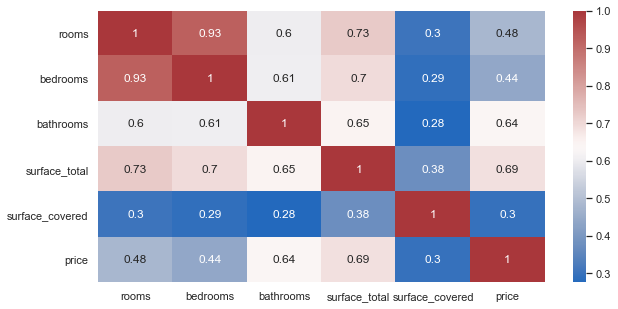

In [79]:
plt.figure(figsize=(10,5))
df = CABA_ML.corr()
sns.heatmap(df, cmap = 'vlag', annot=True)
df

### Primer modelo - K Neighbors Regressor

#### - Considere todos los datos y busque los n_vecinos que mejor optimizaran el modelo:
Con vecinos más cercanos decido etiquetas a partir de ver las instancias de entrenamiento más parecidas a la instancia que queremos clasificar

##### - Divido el dataset en X e y

In [80]:
X = CABA_ML.drop('price', axis=1)
y = CABA_ML.price

##### - Segundo: separo mis datos para entrenar el modelo (train) y para evaluarlo (test)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(54282, 5) (26737, 5) (54282,) (26737,)


##### - Definimos las listas vacias para los valores de rmse calculados

In [82]:
knn_rmse_train = []
knn_rmse_test = []

##### - Definimos la lista de valores de k que vamos a explorar

In [83]:
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20]

##### - Generamos en loop sobre los distintos valores de k

In [84]:
for k in k_vecinos:
    #definimos el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    #entrenamos el modelo
    clf.fit(X_train, y_train)
    
    #predecimos y evaluamos sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    #predecimos y evaluamos sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    #Agregar la información a las listas
    knn_rmse_train.append(rmse_train)
    knn_rmse_test.append(rmse_test)
    
    

##### - Para graficar el modelo de vecinos

Text(0, 0.5, 'RMSE')

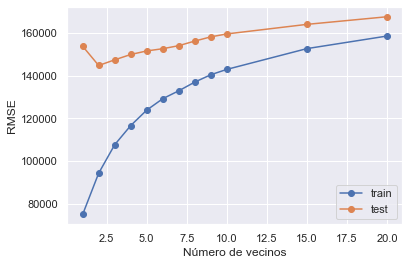

In [85]:
plt.plot(k_vecinos, knn_rmse_train, 'o-', label='train')
plt.plot(k_vecinos, knn_rmse_test,'o-', label='test')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('RMSE')


##### Resultado: 
Con base en los resultados de este modelo y observando la relación entre tain/testing en la gráfica,  elegí un numero de vecinos en un rango entre 7 a 10, esto con el fin de no tener una gran diferencia ni tampoco un valor tan grande para que el modelo no se vuelva tan complejo.

### Segundo Modelo - Decision Tree Regressor

#### - Considere todos los datos y busque la profundidad que mejor optimizara el modelo:
Con árboles de decisión busco encontrar en los datos las preguntas que me permitan clasificar nuevas instancias a partir de los valores de algunas de sus propiedades

##### - Definimos las listas avcias para los valores de rmse calculados

In [86]:
tree_rmse_train = []
tree_rmse_test = []

##### - Definimos la lista de valores de max_depth que vamos a explorar

In [87]:
max_depths = [1,2,3,4,5,6,7,8,9,10,20,30,50]

##### - Generamos Un loop sobre los distintos valores de profundidad

In [88]:
for max_depth in max_depths:
    
    #Definimos el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state = 42)
    
    #Entrenar el modelo
    clf.fit(X_train, y_train)
    
    #Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    #Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    #Agregar la información a las listas
    tree_rmse_train.append(rmse_train)
    tree_rmse_test.append(rmse_test)

##### - Para graficar el modelo

Text(0, 0.5, 'Error')

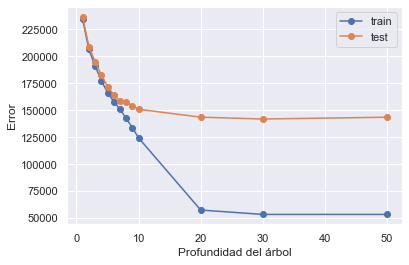

In [89]:
plt.plot(max_depths, tree_rmse_train, 'o-', label='train')
plt.plot(max_depths, tree_rmse_test, 'o-', label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Error')

#### Resultado: 
Con base en los resultados de este modelo y observando la relación de train/testing en la gráfica pude definir un rango entre 5 a 8 valores de profundidad, con el fin de no tener una gran diferencia y aunque se tendra un mayor RMSE no habra gran cambio entre la predicción generada y el valor real. 

#### Definimos los modelos y entrenamos:

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [91]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [92]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [93]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.38954643e+04 -6.38395080e+04  1.34789639e+05  2.06318954e+03
  5.89076142e+01] -61617.843802004645




#### Análisis: 
Implementamos RMSE tanto para los modelos de KNN como para el de Árboles, ya que es la métrica más utilizada para tareas de regresión y es la raíz cuadrada de la diferencia cuadrática promedio entre el valor objetivo y el valor predicho por el modelo. Se prefiere más en algunos casos porque los errores se cuadran primero antes del promedio, lo que representa una penalización alta en errores grandes. Esto implica que RMSE es útil cuando no se desean errores grandes.
Tanto en el caso de Árboles como en KNN, al escoger un modelo no sólo se tuvo en cuenta minimizar el error de test, si no también la diferencia entre train/testing, eligiendo los parámetros que disminuyan el overfitting/underfitting.

Modelo: Regresión lineal
Raiz del error cuadrático medio en Train: 198721.72336056287
Raíz del error cuadrático medio en Test: 202947.87915416766


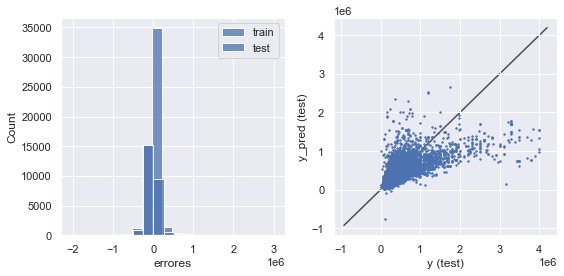

Modelo: Arbol de decisión
Raiz del error cuadrático medio en Train: 124412.81524287
Raíz del error cuadrático medio en Test: 150928.83036864636


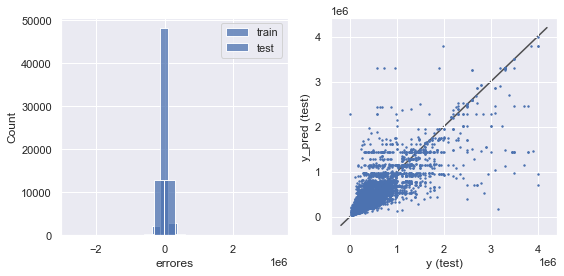

Modelo: Vecinos mas cercanos
Raiz del error cuadrático medio en Train: 94374.6849395111
Raíz del error cuadrático medio en Test: 144818.72157343585


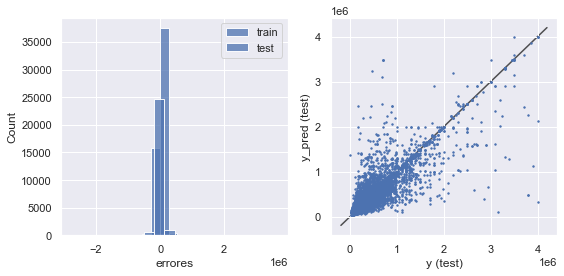

In [94]:
modelos = ['Regresión lineal', 'Arbol de decisión', 'Vecinos mas cercanos']

for i, model in enumerate ([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raiz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))
    
    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label ='train')
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test, y_test_pred, s=2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]), #min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]), #max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    
    

### Análisis y Mejoras del proyecto:
Como cientificos de datos nuestro reto principal es extraer valor de los datos, esto con el fin de brindar a la empresa o al cliente una mayor seguridad en la toma de decisiones.
Aquí se necesitará la metodología correcta para organizar el trabajo, analizar diferentes tipos de datos y resolver un problema.



Inicie con la etapa de identificación y contextualización para la formulación del objetivo del proyecto de ciencia de datos. Me resulta sumamente útil tener una idea muy clara de lo que estamos tratando de lograr mediante el análisis del conjunto de datos en cuestión. Averigue sobre la empresa y como se maneja el negocio de las inmobiliarias, entender el contexto social del dataset y del pais del que provenian los datos al igual que de las expresiones desconocidas para mí.


Una práctica fundamental fue hacerme preguntas como:
- ¿Qué decisiones se deben tomar a partir de estos datos?
- ¿Qué preguntas deseamos responder?
- Para obtener respuestas, ¿con qué nivel de confianza estaríamos contentos?
- ¿Qué decisiones le gustaría tomar a la parte interesada a partir de estos datos?


Para la etapa de comprensión trate de tener una idea general de los datos. Comence explorando y filtrando en varios campos que me encaminaran mejor al objetivo del proyecto.
Fue clave determinar el tipo de herramientas a utilizar como Jupyter y Python con sus librerias Pandas, Numpy, Matplotlib, Seaborn al igual que las discusiones en el grupo, apoyo del docente, etc.
Si se tiene una línea de visión clara hacia el objetivo, a medida que se obtenga una mejor comprensión de los datos, se podrá determinar qué aspectos son más importantes para los análisis

Una práctica importante es hacernos preguntas como:
- ¿Cuál es el tamaño de los datos?
- ¿Los datos tienen formatos consistentes (fechas, ubicaciones, etc.)?
- ¿Cuál es la calidad general de los datos? 
- ¿Cuál es el nivel de limpieza requerido?
- ¿Hay áreas en las que el sesgo podría ser un problema?



En la etapa de proceso se toma la mayor parte del tiempo, es importante priorizar a qué aspectos de los datos se dedica más tiempo; concentrarnos en lo que creemos que es lo más importante y volver a los campos secundarios solo si es necesario y si hay tiempo para hacerlo.  En esta etapa, debemos asegurarnos de que los datos estén en el formato correcto para el algoritmo de aprendizaje automático que elegimos en la etapa de enfoque analítico. 


Aquí es importante tener en cuenta ciertos pasos como:
- Identificar y eliminar datos que no sean relevantes para el objetivo definido del proyecto.
- Identificar y eliminar duplicados
- Asegúrese de que los datos importantes sean coherentes en términos de formato (fechas, horas, ubicaciones)
- Elimine los datos que claramente no están en línea con la realidad, estos son valores atípicos que es poco probable que sean datos reales
- Corregir errores estructurales (errores tipográficos, mayúsculas inconsistentes)
- Maneje los datos faltantes (NaN y nulos, ya sea por caída o interpolación, según el escenario)

En este proyecto, he considerado que algunas variables del dataset como 'start_date', 'end_date','created_on', 'title' y 'description' me ayudan a entender el contexto de la situación, pero no me ofrecen mayor utilidad para expresar el problema en el contexto de técnicas estadísticas y de aprendizaje automático, por lo cual decidi eliminarlas.

Todas las demás variables me permitieron entender el negocio y el enfoque analitico, que es esencial ya que ayuda a identificar qué tipo de patrones se necesitarán para abordar la pregunta de manera más efectiva. 
Tenemos variables como latitud y longitud que podrian aportar mucho más valor al desarrollo del proyecto, ya que acorde a la ubicación de la propiedad dependera el precio.


Para la etapa del análisis me encargue de inspeccionar, explorar y modelar datos para encontrar patrones y relaciones que antes se desconocían. Fue fundamental apoyarme en herramientas de visualización para buscar tendencias, correlaciones. Al llevar a cabo el análisis me he dado cuenta de que la dispersión es muy alta, por lo cual seria recomendable adentrarme en técnicas más avanzadas para su tratamiento.

Para el modelado me centre en el desarrollo de modelos descriptivos, el cual es un proceso matemático que describe eventos del mundo real y las relaciones entre los factores responsables de ellos,en este caso se utiliza un set de entrenamiento que es un conjunto de datos históricos en los que ya se conocen los resultados. 

Frente al análisis de los modelos he decidido que el más acertado es el modelo de vecinos más cercanos (KNN), esto no solo por la disminución en los valores del error cuadrático medio en train y el error cuadrático medio en test comparado con los modelos de árbol de decisión y regresión lineal, sino porque no hace suposiciones explícitas sobre la forma funcional de los datos, evitando los peligros de la distribución subyacente de los datos. Aunque en este método su precisión puede verse afectada por el ruido o las características irrelevantes. 

Para mejorar podriamos implementar las coordenadas geográficas con el fin de buscar información sobre los medios de transporte y cruzar los datos, obtener mejores resultados de precios y asi comprender mejor el valor de las propiedades ya que si bien obtenemos los precios de los barrios por macro podemos obtener resultados micro con este tipo de información. También, seria bueno determinar un público objetivo de la inmobiliaria Properati con el fin de determinar si los datos que tenemos son suficientes para analizar y dar respuesta a un problematica más especifica.


### Comparto el feedback proporcionado por el evaluador de la plataforma Acámica sobre el presente proyecto 👩🏻‍💻
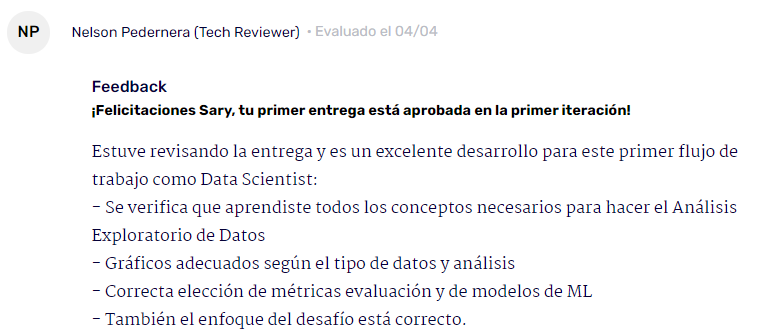
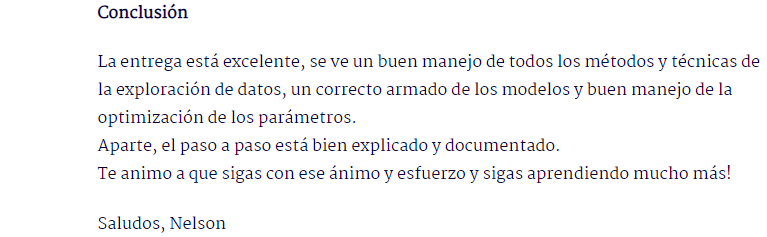

#### ¡Nunca pares de aprender! 🚀🚀🚀
##### Gracias por llegar hasta aquí y espero que te guste mi proyecto. Mejoramos cada día poniendo amor y disciplina a todo lo que hacemos. 

### Maria Sary Libreros Gordillo
##### Correo: sarylibreros@hotmail.com
##### Celular: (+57) 3007633349